In [ ]:
# Name(1): Fady Shehata Zakaria   , ID(1): 20180192
# Name(2): Mahmoud Fahmy Elsayed  , ID(2): 20180257
# Name(3): Youssef Fawzy Mohamed  , ID(3): 20180349
# Name(4): Youssef Mansour Gad    , ID(4): 20180353
# Name(5): Fatma Elzahraa Yahia   , ID(5): 20180194

from numpy.ma.core import array
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib as plt

data = pd.read_csv("emails.csv")
df = pd.DataFrame(data)

true_la=df['Prediction']
true_label=np.array(true_la)
print(true_label)

df.drop(['Email No.'],inplace=True, axis = 1)
df.drop(['Prediction'],inplace=True, axis = 1)
print(df)


X_tr = pd.DataFrame(df.iloc[:len(df), :])


pca = PCA(n_components = 2)
X_train =pd.DataFrame(pca.fit_transform(X_tr))
x_train=np.array(X_train)
print(x_train)



[0 0 0 ... 1 1 0]
      the  to  ect  and  for  ...  infrastructure  military  allowing  ff  dry
0       0   0    1    0    0  ...               0         0         0   0    0
1       8  13   24    6    6  ...               0         0         0   1    0
2       0   0    1    0    0  ...               0         0         0   0    0
3       0   5   22    0    5  ...               0         0         0   0    0
4       7   6   17    1    5  ...               0         0         0   1    0
...   ...  ..  ...  ...  ...  ...             ...       ...       ...  ..  ...
5167    2   2    2    3    0  ...               0         0         0   0    0
5168   35  27   11    2    6  ...               0         0         0   1    0
5169    0   0    1    1    0  ...               0         0         0   0    0
5170    2   7    1    0    2  ...               0         0         0   1    0
5171   22  24    5    1    6  ...               0         0         0   0    0

[5172 rows x 3000 columns]
[[-171

In [ ]:
from itertools import islice, cycle
import queue
import matplotlib.pyplot as plt
class CustomDBSCAN:
      def __init__(self):
        self.core = -1
        self.border = -2
      
      def neighbour_points(self, data, pointId, epsilon):
        points = []
        for i in range(len(data)):
          # Euclidian distance
          if np.linalg.norm([a_i - b_i for a_i, b_i in zip(data[i],data[pointId])]) <= epsilon:
            points.append(i)
        return points

      def fit(self, data, Eps, MinPt):
          # initialize all points as outliers
          point_label = [0] * len(data)
          point_count = []

          # initilize list for core/border points
          core = []
          border = []

          # Find the neighbours of each individual point
          for i in range(len(data)):
              point_count.append(self.neighbour_points(data, i, Eps))

          # Find all the core points, border points and outliers
          for i in range(len(point_count)):
              if (len(point_count[i]) >= MinPt):
                  point_label[i] = self.core
                  core.append(i)
              else:
                  border.append(i)

          for i in border:
              for j in point_count[i]:
                  if j in core:
                      point_label[i] = self.border
                      break

          # Assign points to a cluster

          cluster = 1

          # Here we use a queue to find all the neighbourhood points of a core point and find the
          # indirectly reachable points.
          # We are essentially performing Breadth First search of all points which are within
          # epsilon distance from each other
          for i in range(len(point_label)):
              q = queue.Queue()
              if (point_label[i] == self.core):
                  point_label[i] = cluster
                  for x in point_count[i]:
                      if(point_label[x] == self.core):
                          q.put(x)
                          point_label[x] = cluster
                      elif(point_label[x] == self.border):
                          point_label[x] = cluster
                  while not q.empty():
                      neighbors = point_count[q.get()]
                      for y in neighbors:
                          if (point_label[y] == self.core):
                              point_label[y] = cluster
                              q.put(y)
                          if (point_label[y] == self.border):
                              point_label[y] = cluster
                  cluster += 1  # Move on to the next cluster

          return point_label, cluster
      def visualize(self, data, cluster, numberOfClusters):
            N = len(data)
            # Define colors, ideally better to have around 7-10 colors defined
            colors = np.array(list(islice(cycle(['#FE4A49', '#2AB7CA']), 3)))

            for i in range(numberOfClusters):
                if (i == 0):
                    # Plot all outliers point as black
                    color = '#000000'
                else:
                    color = colors[i % len(colors)]

                x, y = [], []
                for j in range(N):
                    if cluster[j] == i:
                        x.append(data[j, 0])
                        y.append(data[j, 1])
                plt.scatter(x, y, c=color, alpha=1, marker='.')
            plt.show()    
        
          

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

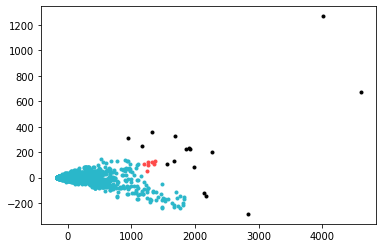

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

#centers = [[0, 0], [1, 0], [1, 1], [2, 2], [3, 1], [3, 0], [0, 1], [3, 2], [6, 3]]

#X = StandardScaler().fit_transform(X_train)

custom_DBSCAN = CustomDBSCAN()
point_labels, clusters = custom_DBSCAN.fit(x_train, 90,4)

print(point_labels)
print("")
print("Num of Clusters: ",clusters)
print("")


custom_DBSCAN.visualize(x_train, point_labels, clusters)



In [ ]:
pred_label=np.array(point_labels)
predict_notSpam=0
predict_Spam=0
for i in range(len(point_labels)):
  if(point_labels[i]==1):
    predict_notSpam+=1
  elif(point_labels[i]==2):
    predict_Spam+=1

true_notSpam=0
true_Spam=0
for j in range(len(true_label)):
  if(true_label[j]==0):
    true_notSpam+=1
  elif(true_label[j]==1):
    true_Spam+=1
    
print("For True Data:")
print("Not Spam emails: ", true_notSpam)
print("Spam emails: ", true_Spam)
print("")
print("For Predictied Data:")
print("Not Spam emails: ", predict_notSpam)
print("Spam emails: ", predict_Spam)


For True Data:
Not Spam emails:  3672
Spam emails:  1500

For Predictied Data:
Not Spam emails:  5149
Spam emails:  7


In [ ]:
#Another function 

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=90, min_samples=4).fit(x_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 2
Estimated number of noise points: 16
